### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

### Reading the Dataset

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5,red
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5,red
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7,red
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7,red
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red


In [4]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [7]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [9]:
df["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [10]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

### Checking missing values

In [11]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

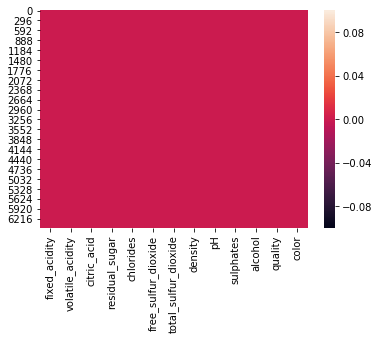

In [12]:
sns.heatmap(df.isnull())

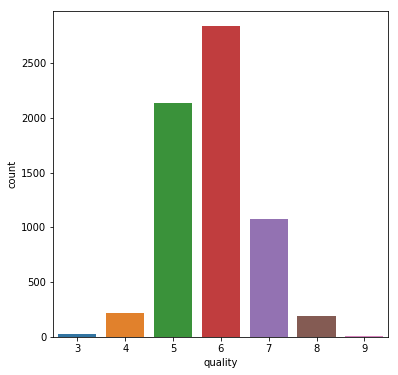

In [13]:
# count plot for the qualities of wine present 
plt.figure(figsize=(6,6))
sns.countplot(df["quality"])

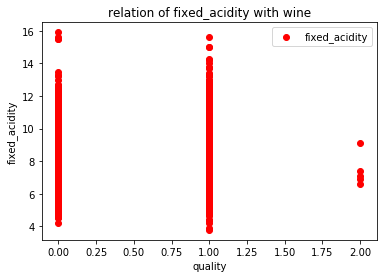

In [46]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(df['quality'], df['fixed_acidity'], color = 'red')
plt.title('relation of fixed_acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed_acidity')
plt.legend()
plt.show()

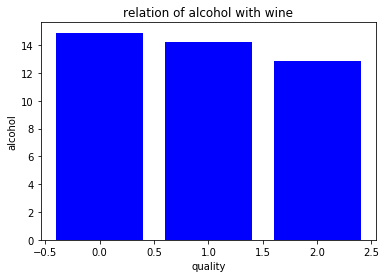

In [47]:
# checking the relation of alcohol with wine

plt.bar(df['quality'], df['alcohol'], color = 'blue')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

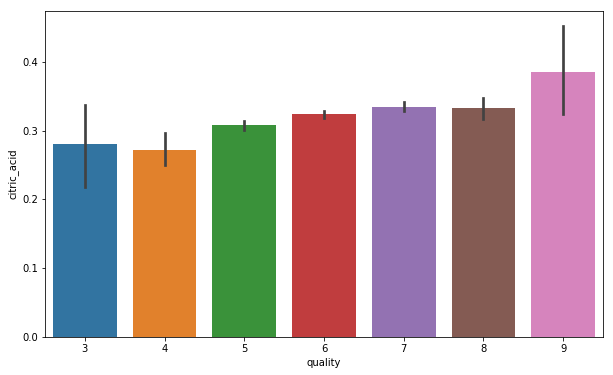

In [16]:
# Composition of citric acid go higher as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "citric_acid", data = df)

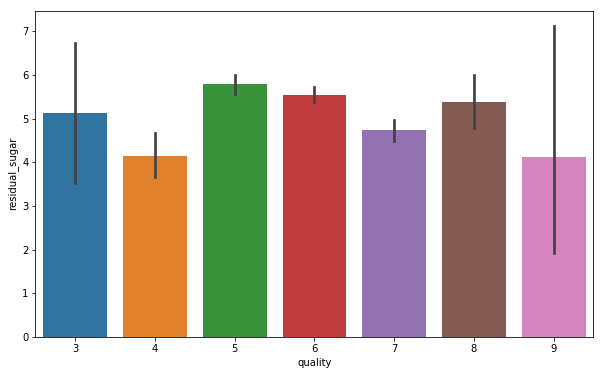

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = df)

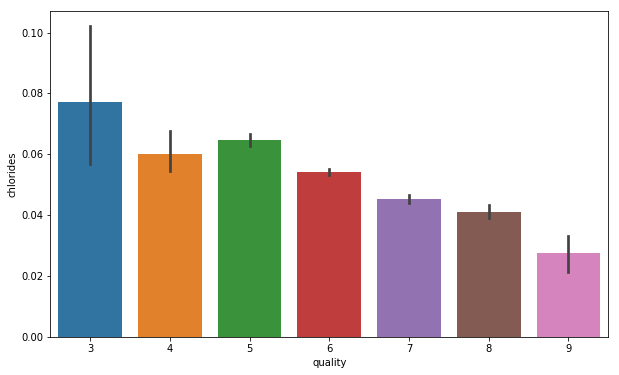

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

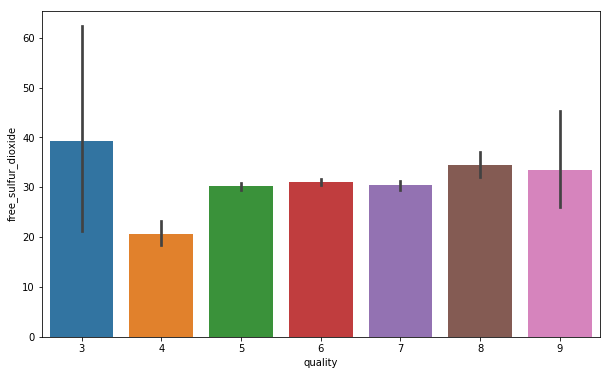

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free_sulfur_dioxide', data = df)

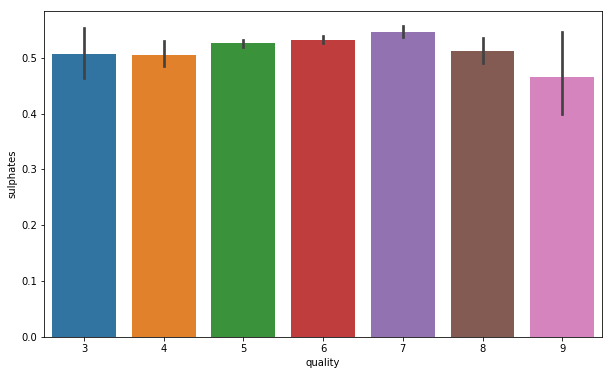

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

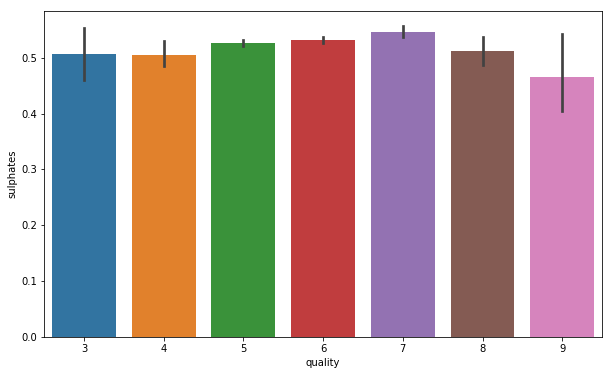

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

In [24]:
df.drop("color",axis=1,inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [25]:
# analyzing the different values present in the dependent variable(quality column)
df['quality'].value_counts()

good    4108
bad     2384
Name: quality, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'].astype(str))

df['quality'].value_counts()

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      1
20      1
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      1
       ..
6467    1
6468    1
6469    1
6470    1
6471    0
6472    1
6473    1
6474    1
6475    1
6476    0
6477    0
6478    1
6479    1
6480    1
6481    0
6482    1
6483    0
6484    1
6485    1
6486    1
6487    0
6488    1
6489    1
6490    1
6491    0
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int32>

In [27]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,0
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,0
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,1
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,0
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,0
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,0
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,1
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,1
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,0


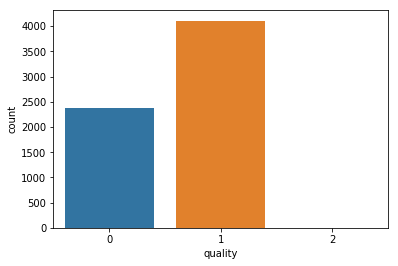

In [28]:
sns.countplot(df['quality'])

In [29]:
# dividing the dataset into dependent and independent variables

x = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(6497, 11)
(6497,)


In [30]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4872, 11)
(4872,)
(1625, 11)
(1625,)


In [31]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7366153846153846


In [33]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       610
           1       0.78      0.81      0.79      1013
           2       0.00      0.00      0.00         2

   micro avg       0.74      0.74      0.74      1625
   macro avg       0.48      0.48      0.48      1625
weighted avg       0.73      0.74      0.73      1625

[[379 231   0]
 [194 818   1]
 [  0   2   0]]


In [34]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7659820393838953

#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model1 = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model1.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7366153846153846


In [36]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       610
           1       0.78      0.81      0.79      1013
           2       0.00      0.00      0.00         2

   micro avg       0.74      0.74      0.74      1625
   macro avg       0.48      0.48      0.48      1625
weighted avg       0.73      0.74      0.73      1625

[[379 231   0]
 [194 818   1]
 [  0   2   0]]


In [37]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.7631131852145361

#### Adaboost

In [38]:
# importing the package 
from sklearn.ensemble import AdaBoostClassifier
# instance creation
adc=AdaBoostClassifier()
## training the model
adc.fit(x_train,y_train)
# prediction
y_pred=adc.predict(x_test)

In [39]:
print(classification_report(y_train,adc.predict(x_train)))

              precision    recall  f1-score   support

           0       0.39      0.98      0.56      1774
           1       0.92      0.13      0.23      3095
           2       1.00      1.00      1.00         3

   micro avg       0.44      0.44      0.44      4872
   macro avg       0.77      0.70      0.60      4872
weighted avg       0.73      0.44      0.35      4872



In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.98      0.57       610
           1       0.89      0.13      0.23      1013
           2       0.00      0.00      0.00         2

   micro avg       0.45      0.45      0.45      1625
   macro avg       0.43      0.37      0.27      1625
weighted avg       0.71      0.45      0.36      1625



C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\prithvi raj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Predicting the quality  of Decision Tree

In [41]:
print(model.predict([[7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000]]))

[0]


In [42]:
print(model.predict([[7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000]]))

[0]


In [44]:
print(model.predict([[7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000]]))

[0]
